# 데이터 준비

In [18]:
import numpy
import pandas as pd
import tensorflow as tf
import requests
import time

#데이터 분할
from sklearn.model_selection import train_test_split



In [20]:
X_data = pd.read_csv("Dataset2.csv") # dataset 1 과 2
X_data = X_data.set_index("Unnamed: 0")
X_data

,PER,EPS증가율,저변동성,QUANTITY,PER스코어,EPS스코어,VOL스코어,QUT스코어,y
Unnamed: 0,,,,,,,,,
A010620,3.61,1163.8,0.028438,-0.012054,-0.401098,-5.961855,0.576659,0.315095,0
A036490,18.63,-6.2,0.021455,-0.000799,-0.251741,0.225732,-0.219643,0.155819,0
A039490,8.06,33.5,0.021396,0.095315,-0.356848,0.015777,-0.226464,-1.204403,0
A088350,10.26,-26.5,0.016679,-0.065330,-0.334971,0.333089,-0.764392,1.069069,0
A020150,38.40,3.0,0.035474,0.017863,-0.055151,0.177077,1.379063,-0.108291,0
...,...,...,...,...,...,...,...,...,...
A010050,6.06,13.0,0.023780,-0.018092,-0.133014,0.107188,-0.913004,0.018623,0
A268280,15.54,-10.8,0.011470,-0.038515,-0.119446,0.155562,-1.731309,0.362234,0
A280360,15.97,7.7,0.020932,-0.066542,-0.118831,0.117960,-1.102329,0.833787,0


In [21]:
#데이터 분할

X = X_data.values[:,4:8]
Y = X_data.values[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=0)


# 결정트리 모델

In [22]:
from sklearn.tree import DecisionTreeClassifier


In [23]:

tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train, Y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, Y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, Y_test)))



훈련 세트 정확도: 0.962
테스트 세트 정확도: 0.931


In [24]:
#특성중요도

print("특성 중요도:\n{}".format(tree.feature_importances_))


특성 중요도:
[0.38966888 0.01096896 0.14249939 0.45686277]


In [25]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["0", "1"],
                
                impurity=False, filled=True)


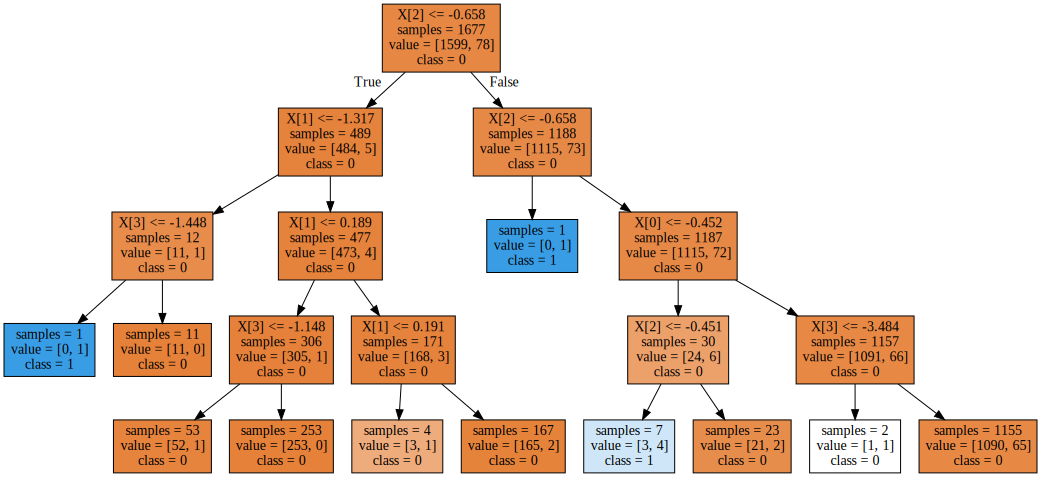

'tree.png.pdf'

In [13]:
import graphviz

import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

dot = graphviz.Source(dot_graph) # dot_graph의 source 저장

dot.render(filename='tree.png') # png로 저장



## cross-validation

In [26]:
from sklearn.model_selection import cross_val_score, cross_validate

score = cross_val_score(tree, X, Y, scoring='accuracy', cv=3)

print('교차 검증별 정확도:', np.round(score, 4))
print('평균 검증 정확도:', np.round(np.mean(score), 4))


교차 검증별 정확도: [0.9492 0.9524 0.9428]
평균 검증 정확도: 0.9481


# 랜덤 포레스트

In [27]:
from sklearn.ensemble import RandomForestClassifier


In [28]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, Y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, Y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, Y_test)))


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.931


In [29]:
print("특성 중요도:\n{}".format(forest.feature_importances_))


특성 중요도:
[0.2044624  0.19212199 0.27135732 0.33205829]


## cross-validation

In [30]:
from sklearn.model_selection import cross_val_score, cross_validate

score = cross_val_score(forest, X, Y, scoring='accuracy', cv=3)

print('교차 검증별 정확도:', np.round(score, 4))
print('평균 검증 정확도:', np.round(np.mean(score), 4))


교차 검증별 정확도: [0.954  0.9508 0.9507]
평균 검증 정확도: 0.9518


# 그래디언트 부스팅

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
gbrt = GradientBoostingClassifier(random_state=0)  #기본값 : 트리 100개, 학습률 0.11
gbrt.fit(X_train, Y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, Y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, Y_test)))


훈련 세트 정확도: 0.975
테스트 세트 정확도: 0.931


In [35]:
print("특성 중요도:\n{}".format(gbrt.feature_importances_))


특성 중요도:
[0.14908434 0.0797548  0.29204042 0.47912044]


## cross-validation

In [34]:
from sklearn.model_selection import cross_val_score, cross_validate

score = cross_val_score(gbrt, X, Y, scoring='accuracy', cv=3)

print('교차 검증별 정확도:', np.round(score, 4))
print('평균 검증 정확도:', np.round(np.mean(score), 4))


교차 검증별 정확도: [0.9492 0.946  0.9444]
평균 검증 정확도: 0.9465


# SVM 소프트벡터 머신

In [36]:
from sklearn.svm import SVC


#### C 가 커질수록 제약이 작아지고 데이터 포인터들의 영향력이 커진다.
#### Gamma 가 커질수록 경계와 포인트의 거리가 줄어들고 모델의 복잡도가 커진다.

In [37]:
svc = SVC()
svc.fit(X_train, Y_train)  #기본값 C=1, gamma=1/n_features

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, Y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, Y_test)))


훈련 세트 정확도: 0.96
테스트 세트 정확도: 0.94


# 군집화

In [45]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5, random_state=0)

k_means.fit(X)

y_pred = k_means.labels_





In [46]:
import matplotlib.pyplot as plt


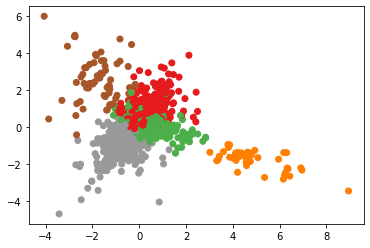

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
kunka = pca.fit_transform(X)

plt.scatter(kunka[:, 0], kunka[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()
